# 2023-04-28

## 이미지 증식시키기 (Image Augmentation)

### 조건

1. 이미지 속 사람의 신체가 잘려있어서는 안됨
2. 이미지의 비율은 자유.
3. 한 이미지세트에 대해서는 같은 증식 조건을 걸어야 함(총 15세트)

In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow

## 1. load images

image shape = (720, 1280, 3)


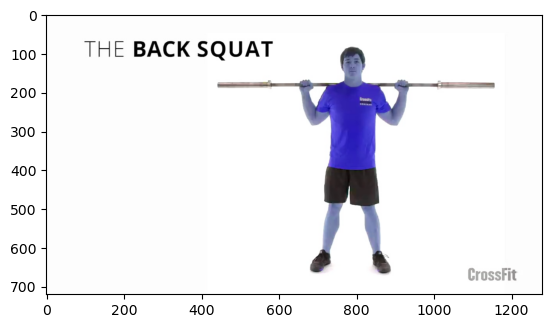

In [27]:
path = './data/images/squat_images/20/exercise_00.jpg'
img = cv2.imread(path)
img_shape = img.shape
print(f'image shape = {img_shape}')

plt.imshow(img)

## 2. ImageDataGenerator

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=20,  # 20도까지 회전
        width_shift_range=0.1,  # 수평방향 이동 최대 10%
        height_shift_range=0.1,  # 수직방향 이동 최대 10%
        zoom_range=0.2,  # 20%까지 확대/축소
        horizontal_flip=True)  # 수평방향 뒤집기

train_generator = train_datagen.flow_from_directory(
        'train_directory',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


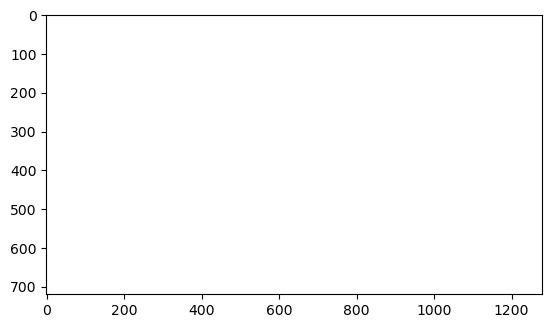

In [13]:
base_img = np.zeros(img_shape) + 255
plt.imshow(base_img)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Resizing, RandomCrop, RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import numpy as np

model = Sequential([
                    Resizing(int(img.shape[0]*1.5), 
                             int(img.shape[1]*1.5)),                   
                    
#                     RandomCrop(img.shape[0], img.shape[0]),
                    
                    RandomFlip('horizontal')])
#                     RandomRotation(np.random.randint(0, 360))])

Model.build(model, (1, img.shape[0], img.shape[1], 3))

# plot_model(model, show_shapes=True, show_dtype=True, show_layer_activations=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


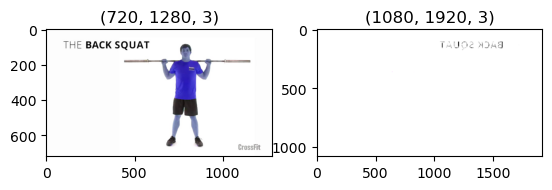

In [31]:
# new_shape = model(test_image).shape[1:-1]
# new = tf.reshape(model(x_train[:1]), new_shape)

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.imshow(img)
ax2.imshow(model(img))
ax1.set_title(img.shape)
ax2.set_title(model(img).shape);

In [34]:
model(img)[:500, :]

<tf.Tensor: shape=(500, 1920, 3), dtype=float32, numpy=
array([[[253., 253., 253.],
        [253., 253., 253.],
        [253., 253., 253.],
        ...,
        [253., 253., 253.],
        [253., 253., 253.],
        [253., 253., 253.]],

       [[253., 253., 253.],
        [253., 253., 253.],
        [253., 253., 253.],
        ...,
        [253., 253., 253.],
        [253., 253., 253.],
        [253., 253., 253.]],

       [[253., 253., 253.],
        [253., 253., 253.],
        [253., 253., 253.],
        ...,
        [253., 253., 253.],
        [253., 253., 253.],
        [253., 253., 253.]],

       ...,

       [[253., 253., 253.],
        [253., 253., 253.],
        [253., 253., 253.],
        ...,
        [253., 253., 253.],
        [253., 253., 253.],
        [253., 253., 253.]],

       [[253., 253., 253.],
        [253., 253., 253.],
        [253., 253., 253.],
        ...,
        [253., 253., 253.],
        [253., 253., 253.],
        [253., 253., 253.]],

       [[253., 2

In [21]:
1080 / 720

1.5

In [4]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(
)